# Lab Experiment 2: Performing Discrete Fourier Transform on different signals
#### i) Make a Composite Sinusoidal Signal and perform DFT on it
#### ii) Apply DFT on an audio or voice signal and identify the frequency
#### iii) Find the frequency component in Healthcare by analyzing ECG Signals

In [62]:
# Importing Required Libraries after setting them in venv
import numpy as np
import matplotlib.pyplot as plt

**i) Make a Composite Sinusoidal Signal and perform DFT on it**  
Making a composite Sinusoidal wave consisting of 3 Sinusoidal Waves of frequencies 1,4,7 and amplitudes 3, 1, 0.5 respectively

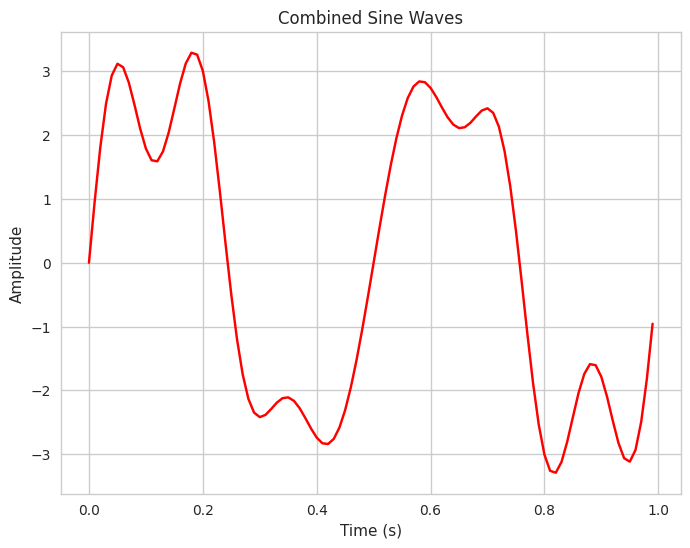

In [63]:
# Parameters
sr = 100  # Sampling rate
duration = 1
# Sampling interval
ts = 1.0 / sr                   # time series
t = np.arange(0, duration, ts)  # time interval

# Sine wave parameters
frequencies = [2, 6, 7]  # Hz
amplitudes = [3, 1, 0.5]
phases = [0, 0, 0]

# Generate sine waves
sine_waves = []
for freq, amp, phase in zip(frequencies, amplitudes, phases):
    sine_wave = amp * np.sin(2 * np.pi * freq * t + phase)
    sine_waves.append(sine_wave)

# Sum the sine waves
combined_signal = np.sum(sine_waves, axis=0)

# Plot the combined signal
plt.figure(figsize=(8, 6))
plt.plot(t, combined_signal ,'r')
plt.title('Combined Sine Waves')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

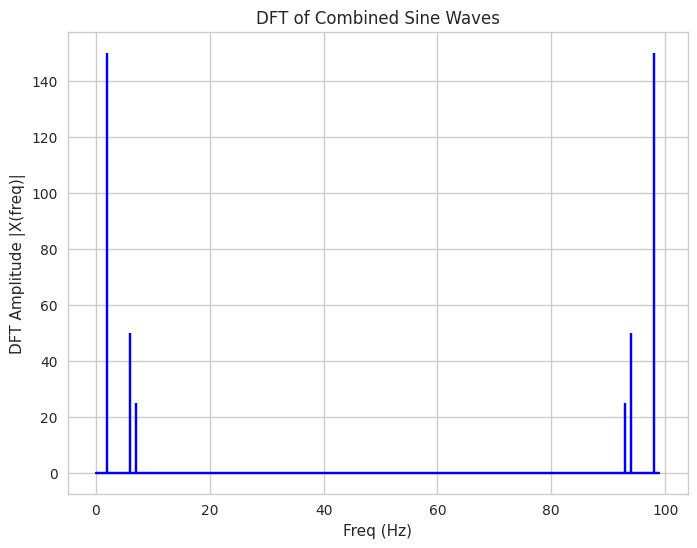

In [64]:
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

def perform_dft(x, sr):
    X = DFT(x)
    
    # Calculate the frequency
    N = len(X)
    n = np.arange(N)
    T = N / sr
    freq = n / T
    
    plt.figure(figsize=(8, 6))
    plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('DFT Amplitude |X(freq)|')
    plt.title('DFT of Combined Sine Waves')
    plt.show()

# Perform DFT on the combined signal
perform_dft(combined_signal, sr)

In [65]:
# Parameters
samplingFrequency = 100
samplingInterval = 1/samplingFrequency
beginTime=0
endTime=10

signal1Frequency=1
signal2Frequency=2
signal3Frequency=3

time=np.arange(beginTime, endTime, samplingInterval);
amplitude1=np.sin(2*np.pi*signal1Frequency*time)
amplitude2=np.sin(2*np.pi*signal2Frequency*time)
amplitude3=np.sin(2*np.pi*signal3Frequency*time)

In [66]:
from scipy.io import wavfile

wavfile.write('lab2signal1.wav', samplingFrequency, amplitude1)
wavfile.write('lab2signal2.wav', samplingFrequency, amplitude2)
wavfile.write('lab2signal3.wav', samplingFrequency, amplitude3)

In [67]:
fs, audio_signal1 = wavfile.read('lab2signal1.wav')
fs, audio_signal2 = wavfile.read('lab2signal2.wav')
fs, audio_signal3 = wavfile.read('lab2signal3.wav')

amplitude1 = audio_signal1.astype(float) / np.max(np.abs(audio_signal1))
amplitude2 = audio_signal2.astype(float) / np.max(np.abs(audio_signal2))
amplitude3 = audio_signal3.astype(float) / np.max(np.abs(audio_signal3))

time = np.arange(0, len(amplitude1)) / fs

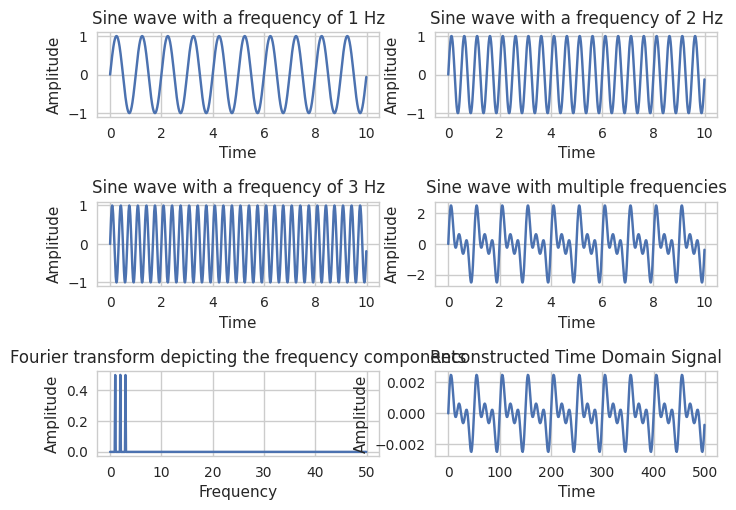

In [68]:
figure, axis = plt.subplots(3, 2)
plt.subplots_adjust(hspace=1)

axis[0][0].set_title('Sine wave with a frequency of 1 Hz')
axis[0][0].plot(time,amplitude1)
axis[0][0].set_xlabel('Time')
axis[0][0].set_ylabel('Amplitude')

axis[0][1].set_title('Sine wave with a frequency of 2 Hz')
axis[0][1].plot(time,amplitude2)
axis[0][1].set_xlabel('Time')
axis[0][1].set_ylabel('Amplitude')

axis[1][0].set_title('Sine wave with a frequency of 3 Hz')
axis[1][0].plot(time,amplitude3)
axis[1][0].set_xlabel('Time')
axis[1][0].set_ylabel('Amplitude')

amplitude=amplitude1 + amplitude2 + amplitude3

axis[1][1].set_title('Sine wave with multiple frequencies')
axis[1][1].plot(time,amplitude)
axis[1][1].set_xlabel('Time')
axis[1][1].set_ylabel('Amplitude')

# Frequency domain representation
fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

tpCount = len(amplitude)
values = np.arange(int(tpCount/2))
timePeriod = tpCount/samplingFrequency
frequencies = values/timePeriod

axis[2][0].set_title('Fourier transform depicting the frequency components')
axis[2][0].plot(frequencies, abs(fourierTransform))
axis[2][0].set_xlabel('Frequency')
axis[2][0].set_ylabel('Amplitude')

reconstructed_signal = np.fft.ifft(fourierTransform)
reconstructed_signal = np.real(reconstructed_signal)
axis[2][1].set_title('Reconstructed Time Domain Signal')
axis[2][1].plot(np.arange(len(reconstructed_signal)), reconstructed_signal)
axis[2][1].set_xlabel('Time')
axis[2][1].set_ylabel('Amplitude')

plt.show()

In [69]:
fs, audio_signal = wavfile.read('./yes.wav')
amplitude = audio_signal.astype(float) / np.max(np.abs(audio_signal))
time = np.arange(0, len(amplitude)) / fs


Text(0, 0.5, 'Amplitude')

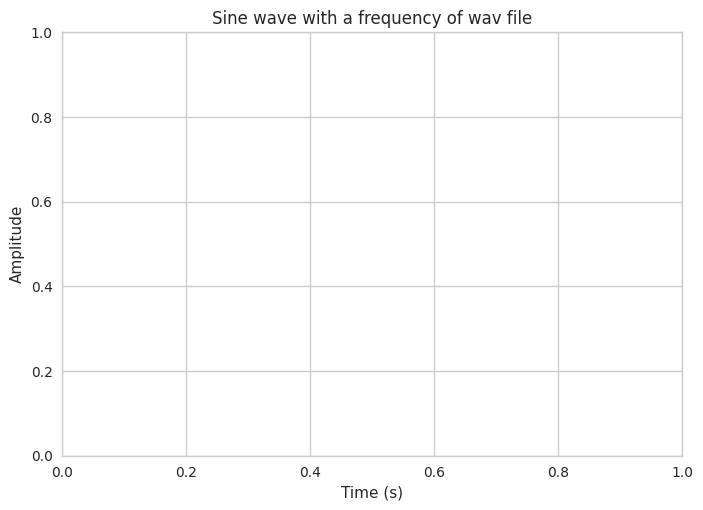

In [70]:
plt.title('Sine wave with a frequency of wav file')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

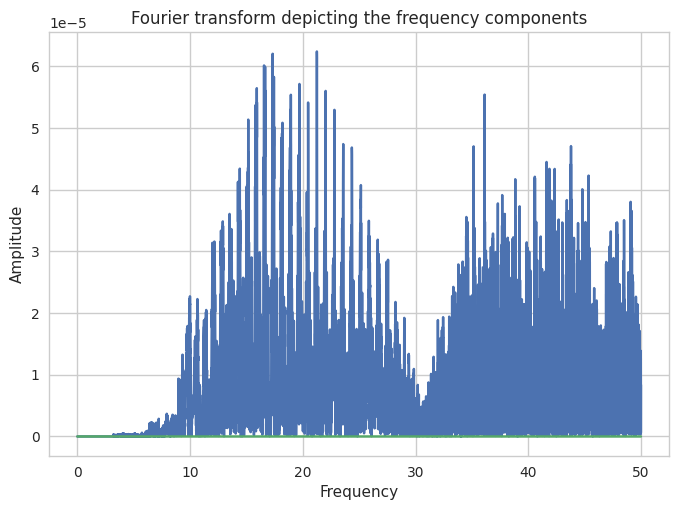

In [71]:
fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

plt.title('Fourier transform depicting the frequency components')
plt.plot(frequencies, abs(fourierTransform))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

In [72]:
from scipy.misc import electrocardiogram
ecg = electrocardiogram()
print(ecg)
ecg.shape, ecg.mean(), ecg.std()

[-0.245 -0.215 -0.185 ... -0.405 -0.395 -0.385]


/tmp/ipykernel_16059/3630219095.py:2: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg = electrocardiogram()


((108000,), -0.16510875, 0.5992473991177294)

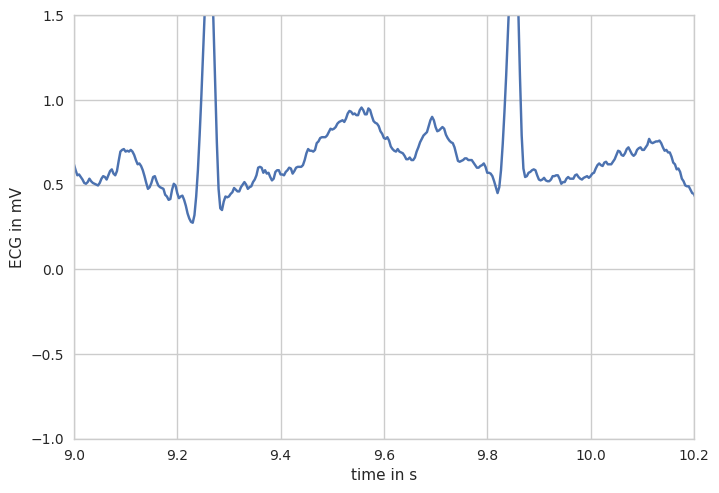

In [73]:
fs = 300
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.show()

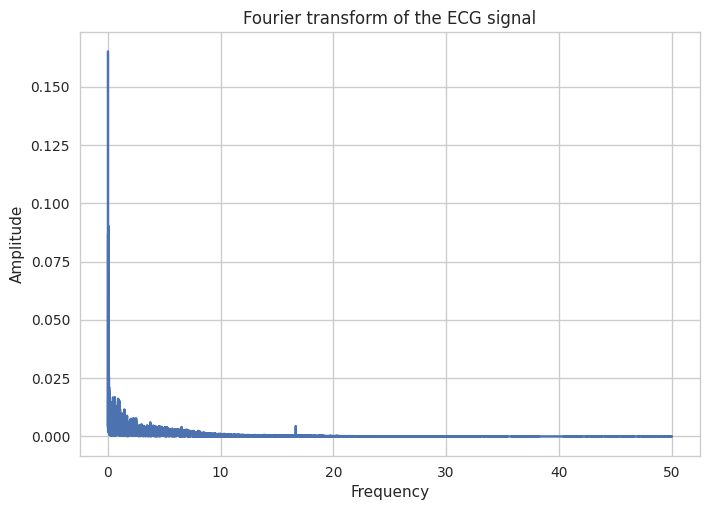

In [74]:
fourierTransformECG = np.fft.fft(ecg)/len(ecg)           # Normalize amplitude
fourierTransformECG = fourierTransformECG[range(int(len(ecg)/2))] # Exclude sampling frequency

tpCount     = len(ecg)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequenciesECG = values/timePeriod

plt.title('Fourier transform of the ECG signal')
plt.plot(frequenciesECG, abs(fourierTransformECG))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()